In [6]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(mnist_train, mnist_validate, mnist_test), info = tfds.load(
    name="mnist",
    split=["train[0:80%]", "train[80%:100%]", "test"], #train, validate, test
    with_info=True,
    as_supervised=True
)

print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\DAnand\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    

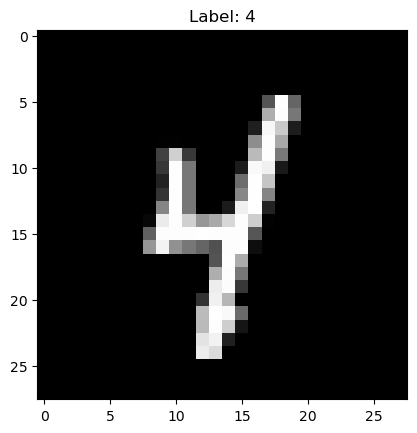

In [5]:
for image, label in mnist_train.take(1):
    plt.imshow(image.numpy().squeeze(), cmap="gray")
    plt.title(f"Label: {label}")
    plt.show()

In [7]:
mnist_train_pipline = mnist_train.map(lambda image, label:encode(image, label))
mnist_validate__pipline = mnist_validate.map(lambda image, label:encode(image, label))
mnist_test_pipline = mnist_test.map(lambda image, label:encode(image, label))

NameError: in user code:

    File "C:\Users\DAnand\AppData\Local\Temp\ipykernel_3720\3031690941.py", line 1, in None  *
        lambda image, label:encode(image, label)

    NameError: name 'encode' is not defined


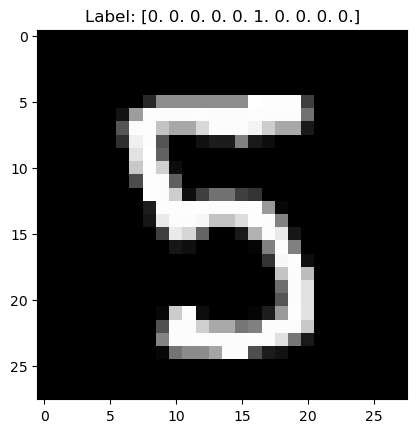

In [9]:
def encode(image, label):
    image_encoded = tf.image.convert_image_dtype(image, dtype=tf.float32) #convert the data type
    label_encode = tf.one_hot(label, depth=10) #one hot encoding

    return image_encoded, label_encode

mnist_train_pipline = mnist_train.map(lambda image, label:encode(image, label))
mnist_validate__pipline = mnist_validate.map(lambda image, label:encode(image, label))
mnist_test_pipline = mnist_test.map(lambda image, label:encode(image, label))

for image, label in mnist_train_pipline.shuffle(1000).take(1):
  plt.imshow(image.numpy().squeeze(), cmap="gray")
  plt.title(f"Label: {label}")
  plt.show()

In [10]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))

model.summary()
#none in 'Output Shape' stands for number of samples

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [23]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
for image, label in mnist_test_pipline.batch(1).take(1):
    print(image.shape, label.shape)

    model.predict(image)

(1, 28, 28, 1) (1, 10)
1/1 [==============================] - 0s 67ms/step


(1, 28, 28, 1) (1, 10)
1/1 [==============================] - 0s 23ms/step
(1, 10)


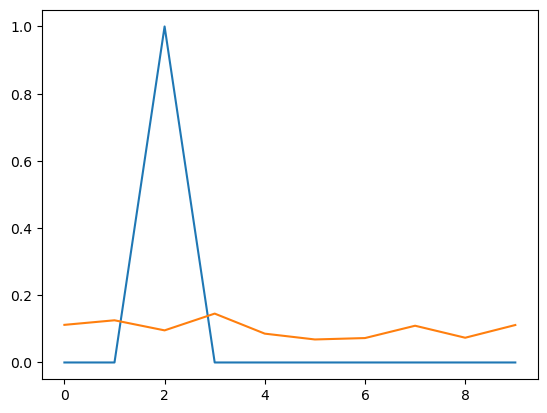

In [25]:
for image, label in mnist_test_pipline.batch(1).take(1):
    print(image.shape, label.shape)
    plt.plot(label[0])
    prediction = model.predict(image)
    print(prediction.shape)
    plt.plot(prediction[0])
# model.predict()

In [26]:
loss, accuracy = model.evaluate(mnist_test_pipline.batch(32), verbose=0)
print(loss)
print(accuracy)

2.356391668319702
0.1080000028014183


In [27]:
# to use 100% of the GPU memory batch size can be optimized 

history = model.fit(
    mnist_train_pipline.shuffle(48000).batch(128),
    epochs=5,
    validation_data=mnist_validate__pipline.batch(128)
)

Epoch 1/5
375/375 [==============================] - 5s 7ms/step - loss: 0.2955 - accuracy: 0.9160 - val_loss: 0.1681 - val_accuracy: 0.9527
Epoch 2/5
375/375 [==============================] - 3s 6ms/step - loss: 0.1216 - accuracy: 0.9645 - val_loss: 0.1184 - val_accuracy: 0.9676
Epoch 3/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0805 - accuracy: 0.9758 - val_loss: 0.0922 - val_accuracy: 0.9735
Epoch 4/5
375/375 [==============================] - 3s 6ms/step - loss: 0.0553 - accuracy: 0.9840 - val_loss: 0.0829 - val_accuracy: 0.9757
Epoch 5/5
375/375 [==============================] - 3s 6ms/step - loss: 0.0407 - accuracy: 0.9883 - val_loss: 0.0782 - val_accuracy: 0.9768


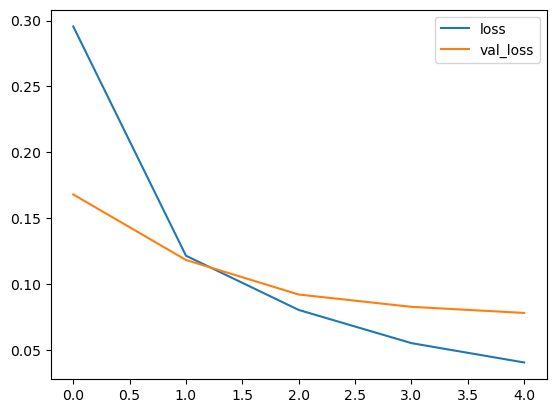

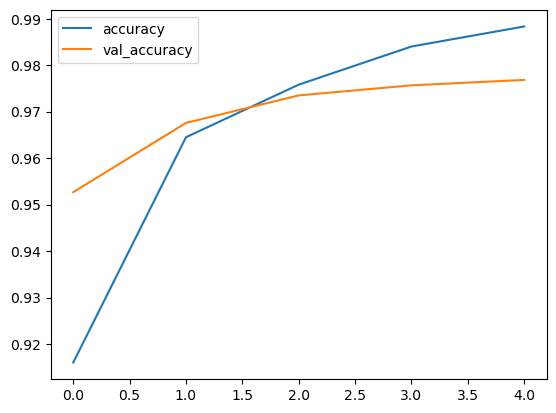

In [29]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()

#overfitting - gradual increase in accuracy in train comapred to val

#important to arrive till point as quickly as possible